# ПРОЕКТ ДЛЯ ЭКЗАМЕНА

Используете ваш датасет по кластеризации, либо выбираете новый

0) Изучаете контекст датасета и придумываете бизнес-цель
1) Делаете постановку задач на исследование (минимум 2 задачи, 1 под классфификацию/регрессию, 1 под кластеризацию (в крайнем случае делаем допущение что у нас нет Y) , )
2) Оценка Датасета (pandas/np/statsmodel...)
3) Подготовка данных
4) Выполнение исследований ( в том числе с промежуточными итогами, визуализациями)
5) Итоговые визуализации и выводы
6) Предложения по развитию вашей работы

# Требования

1. Собственная реализация! Проект будет проверяться на наличие в открытых источниках (не БД, а сама аналитика). В случае копипаста чужого проекта - пересдача осенью
2. Оформление. Используем разделы, заголовки, текстовые вставки, подписи, фактически как упрощенная курсовая но в юпайтере
3. Подготовтесь. У вас должен быть план рассказа. Вопросы могут быть как про код, так и например почему вы выбрали именно такие признаки(на бизнес логику и область знаний вашего датасета)
4. Тетрадка должна быть выложена на ваш Git
5. До экзамена вы можете попросить меня чекнуть, что бы не было казусов

Пример "идеального" подхода

  - Очистка и форматирование данных.
  -  Разведочный анализ данных.
  - Конструирование и выбор признаков.
  - Сравнение метрик нескольких моделей машинного обучения.
  -  Гиперпараметрическая настройка лучшей модели.
  -   Оценка лучшей модели на тестовом наборе данных.
  -   Интерпретирование результатов работы модели.
  -   Выводы и работа с документами.

Прежде чем писать код, необходимо разобраться в решаемой задаче и доступных данных. В этом проекте мы будем работать с выложенными в общий доступ данными об энергоэффективности зданий в Нью-Йорке.

Наша цель: использовать имеющиеся данные для построения модели, которая прогнозирует количество баллов Energy Star Score для конкретного здания, и интерпретировать результаты для поиска факторов, влияющих на итоговый балл.


Данные уже включают в себя присвоенные баллы Energy Star Score, поэтому наша задача представляет собой машинное обучение с управляемой регрессией:


Управляемая (Supervised): нам известны признаки и цель, и наша задача — обучить модель, которая сможет сопоставить первое со вторым.
Регрессия (Regression): балл Energy Star Score — это непрерывная переменная.

## Очистка данных


Далеко не каждый набор данных представляет собой идеально подобранное множество наблюдений, без аномалий и пропущенных значений (намек на датасеты mtcars и iris). В реальных данных мало порядка, так что прежде чем приступить к анализу, их нужно очистить и привести к приемлемому формату. Очистка данных — неприятная, но обязательная процедура при решении большинства задач по анализу данных.


In [2]:
ls

Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017_Data_for.csv*
L1.ipynb*
L6.ipynb*
L7.ipynb*
L8.ipynb*
Lesson_2_Special_Cl_ML.ipynb*
Lesson_7_overfitt_example_project_Statsmodel.ipynb*
__pycache__/
bot.py*
hello.py*
misis.zip*
static/
templates/
Мисис_2022_успеваемость_Зачет.xlsx*


Сначала можно загрузить данные  и изучить их:


In [3]:
import pandas as pd
import numpy as np

# Read in data into a dataframe 
data = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017_Data_for.csv')

# Display top of dataframe
data.head()

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2  ...  \
0  201/205  East  42nd  st.            Not Available  ...   
1          622 168th Street            Not Available  ...   
2             3975 Broadway            Not Available  ...   
3   161 Fort Washington Ave  177 Fort Washington Ave  ...   
4     710 West 168th Street            Not Available  ...   

  Source EUI (kBtu/ft²)            Release Date Water Required?  \
0                 619.4  05/01/2017 05:32:03 PM              No   
1                 404.3  04/27/2017 11:23:27 AM              No   
2         Not Available  04/27/2017 11:23:27 AM              No   
3         Not Available  04/27/2017 11:23:27 AM              No   
4         Not Available  04/27/2017 11:23:27 AM              No   

  DOF Benchmarking Submission Status   Latitude  Longitude Community Board  \
0                      In Compliance  40.750791 -73.973963             6.0   
1                      In Compliance  40.841402 -73.942568            12.0   
2                      In Compliance  40.840427 -73.940249            12.0   
3                      In Compliance  40.840746 -73.942854            12.0   
4                      In Compliance  40.841559 -73.942528            12.0   

  Council District Census Tract  \
0              4.0         88.0   
1             10.0        251.0   
2             10.0        251.0   
3             10.0        255.0   
4             10.0        255.0   

                                                 NTA  
0  Turtle Bay-East Midtown                       ...  
1  Washington Heights South                      ...  
2  Washington Heights South                      ...  
3  Washington Heights South                      ...  
4  Washington Heights South                      ...  

[5 rows x 60 columns]

Даже здесь видно несколько проблем: нам нужно прогнозировать Energy Star Score, но мы не знаем, что означают все эти колонки. Хотя это не обязательно является проблемой, потому что зачастую можно создать точную модель, вообще ничего не зная о переменных. Но нам важна интерпретируемость, поэтому нужно выяснить значение как минимум нескольких колонок.

Когда мы получили эти данные, то не стали спрашивать о значениях, а посмотрели на название файла

и решили поискать по запросу «Local Law 84». Мы нашли  страницу, на которой говорилось, что речь идёт о действующем в Нью-Йорке законе, согласно которому владельцы всех зданий определённого размера должны отчитываться о потреблении энергии. Дальнейший поиск помог найти все значения колонок. Так что не пренебрегайте именами файлов, они могут быть хорошей отправной точкой. К тому же это напоминание, чтобы вы не торопились и не упустили что-нибудь важное!

Мы не будем изучать все колонки, но точно разберёмся с Energy Star Score, которая описывается так:


Ранжирование по перцентили от 1 до 100, которая рассчитывается на основе самостоятельно заполняемых владельцами зданий отчётов об энергопотреблении за год. Energy Star Score — это относительный показатель, используемый для сравнения энергоэффективности зданий.

Первая проблема решилась, но осталась вторая — отсутствующие значения, помеченные как «Not Available». Это строковое значение в Python, которое означает, что даже строки с числами будут храниться как типы данных object, потому что если в колонке есть какая-нибудь строковая, Pandas конвертирует её в колонку, полностью состоящую из строковых. Типы данных колонок можно узнать с помощью метода dataframe.info():


In [93]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [94]:
data.describe()

Order   Property Id  DOF Gross Floor Area    Year Built  \
count  11746.000000  1.174600e+04          1.162800e+04  11746.000000   
mean    7185.759578  3.642958e+06          1.732695e+05   1948.738379   
std     4323.859984  1.049070e+06          3.367055e+05     30.576386   
min        1.000000  7.365000e+03          5.002800e+04   1600.000000   
25%     3428.250000  2.747222e+06          6.524000e+04   1927.000000   
50%     6986.500000  3.236404e+06          9.313850e+04   1941.000000   
75%    11054.500000  4.409092e+06          1.596140e+05   1966.000000   
max    14993.000000  5.991312e+06          1.354011e+07   2019.000000   

       Number of Buildings - Self-reported     Occupancy  \
count                         11746.000000  11746.000000   
mean                              1.289971     98.762557   
std                               4.017484      7.501603   
min                               0.000000      0.000000   
25%                               1.000000    100.000000   
50%                               1.000000    100.000000   
75%                               1.000000    100.000000   
max                             161.000000    100.000000   

       Property GFA - Self-Reported (ft²)     Latitude    Longitude  \
count                        1.174600e+04  9483.000000  9483.000000   
mean                         1.673739e+05    40.754379   -73.957057   
std                          3.189238e+05     0.080120     0.046337   
min                          0.000000e+00    40.516065   -74.243582   
25%                          6.699400e+04    40.707226   -73.984662   
50%                          9.408000e+04    40.759130   -73.962810   
75%                          1.584140e+05    40.817623   -73.932443   
max                          1.421712e+07    40.912869   -73.715543   

       Community Board  Council District   Census Tract  
count      9483.000000       9483.000000    9483.000000  
mean          7.140673         15.771275    4977.596647  
std           3.954129         15.674375   13520.422990  
min           1.000000          1.000000       1.000000  
25%           4.000000          4.000000     100.000000  
50%           7.000000          9.000000     201.000000  
75%           9.000000         33.000000     531.500000  
max          56.000000         51.000000  155101.000000

Наверняка некоторые колонки, которые явно содержат числа (например, ft²), сохранены как объекты. Мы не можем применять числовой анализ к строковым значениям, так что конвертируем их в числовые типы данных (особенно float)!


Этот код сначала заменяет все «Not Available» на not a number (np.nan), которые можно интерпретировать как числа, а затем конвертирует содержимое определённых колонок в тип float:


In [95]:
data = data.replace({'Not Available': np.nan})


In [96]:
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [8]:
data.head(2)

Order  Property Id               Property Name Parent Property Id  \
0      1        13286                     201/205              13286   
1      2        28400  NYP Columbia (West Campus)              28400   

         Parent Property Name BBL - 10 digits  \
0                     201/205      1013160001   
1  NYP Columbia (West Campus)      1021380040   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   

  Address 1 (self-reported) Address 2  ... Source EUI (kBtu/ft²)  \
0  201/205  East  42nd  st.       NaN  ...                 619.4   
1          622 168th Street       NaN  ...                 404.3   

             Release Date Water Required? DOF Benchmarking Submission Status  \
0  05/01/2017 05:32:03 PM              No                      In Compliance   
1  04/27/2017 11:23:27 AM              No                      In Compliance   

    Latitude  Longitude Community Board Council District  Census Tract  \
0  40.750791 -73.973963             6.0              4.0          88.0   
1  40.841402 -73.942568            12.0             10.0         251.0   

                                                 NTA  
0  Turtle Bay-East Midtown                       ...  
1  Washington Heights South                      ...  

[2 rows x 60 columns]

In [9]:
data.describe()


Order   Property Id  DOF Gross Floor Area  \
count  11746.000000  1.174600e+04          1.162800e+04   
mean    7185.759578  3.642958e+06          1.732695e+05   
std     4323.859984  1.049070e+06          3.367055e+05   
min        1.000000  7.365000e+03          5.002800e+04   
25%     3428.250000  2.747222e+06          6.524000e+04   
50%     6986.500000  3.236404e+06          9.313850e+04   
75%    11054.500000  4.409092e+06          1.596140e+05   
max    14993.000000  5.991312e+06          1.354011e+07   

       Largest Property Use Type - Gross Floor Area (ft²)  \
count                                       1.174400e+04    
mean                                        1.605524e+05    
std                                         3.095746e+05    
min                                         5.400000e+01    
25%                                         6.520100e+04    
50%                                         9.132400e+04    
75%                                         1.532550e+05    
max                                         1.421712e+07    

       2nd Largest Property Use - Gross Floor Area (ft²)  \
count                                        3741.000000   
mean                                        22778.682010   
std                                         55094.441422   
min                                             0.000000   
25%                                          4000.000000   
50%                                          8654.000000   
75%                                         20000.000000   
max                                        962428.000000   

       3rd Largest Property Use Type - Gross Floor Area (ft²)    Year Built  \
count                                        1484.000000       11746.000000   
mean                                        12016.825270        1948.738379   
std                                         27959.755486          30.576386   
min                                             0.000000        1600.000000   
25%                                          1720.750000        1927.000000   
50%                                          5000.000000        1941.000000   
75%                                         12000.000000        1966.000000   
max                                        591640.000000        2019.000000   

       Number of Buildings - Self-reported     Occupancy  ENERGY STAR Score  \
count                         11746.000000  11746.000000        9642.000000   
mean                              1.289971     98.762557          59.854594   
std                               4.017484      7.501603          29.993586   
min                               0.000000      0.000000           1.000000   
25%                               1.000000    100.000000          37.000000   
50%                               1.000000    100.000000          65.000000   
75%                               1.000000    100.000000          85.000000   
max                             161.000000    100.000000         100.000000   

       ...  Indirect GHG Emissions (Metric Tons CO2e)  \
count  ...                               1.168100e+04   
mean   ...                               2.076339e+03   
std    ...                               5.931295e+04   
min    ...                              -2.313430e+04   
25%    ...                               9.480000e+01   
50%    ...                               1.718000e+02   
75%    ...                               4.249000e+02   
max    ...                               4.764375e+06   

       Property GFA - Self-Reported (ft²)  \
count                        1.174600e+04   
mean                         1.673739e+05   
std                          3.189238e+05   
min                          0.000000e+00   
25%                          6.699400e+04   
50%                          9.408000e+04   
75%                          1.584140e+05   
max                          1.421712e+07   

       Water Use (All Water Sources) (kgal)  \


Когда значения в соответствующих колонках у нас станут числами, можно начинать исследовать данные.


###### Отсутствующие и аномальные данные


Наряду с некорректными типами данных одна из самых частых проблем — отсутствующие значения. Они могут отсутствовать по разным причинам, и перед обучением модели эти значения нужно либо заполнить, либо удалить. Сначала давайте выясним, сколько у нас не хватает значений в каждой колонке .


In [97]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [98]:
missing_values_table(data)


Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


Missing Values  \
Fuel Oil #1 Use (kBtu)                                       11737   
Diesel #2 Use (kBtu)                                         11730   
Address 2                                                    11539   
Fuel Oil #5 & 6 Use (kBtu)                                   11152   
District Steam Use (kBtu)                                    10810   
Fuel Oil #4 Use (kBtu)                                       10425   
3rd Largest Property Use Type - Gross Floor Are...           10262   
3rd Largest Property Use Type                                10262   
Fuel Oil #2 Use (kBtu)                                        9165   
2nd Largest Property Use Type                                 8005   
2nd Largest Property Use - Gross Floor Area (ft²)             8005   
Metered Areas  (Water)                                        4609   
Water Intensity (All Water Sources) (gal/ft²)                 3984   
Water Use (All Water Sources) (kgal)                          3984   
Latitude                                                      2263   
Longitude                                                     2263   
Community Board                                               2263   
Council District                                              2263   
Census Tract                                                  2263   
NTA                                                           2263   
ENERGY STAR Score                                             2104   
Weather Normalized Site Natural Gas Intensity (...            1963   
Weather Normalized Site Natural Gas Use (therms)              1962   
Weather Normalized Source EUI (kBtu/ft²)                      1465   
Weather Normalized Site EUI (kBtu/ft²)                        1465   
Natural Gas Use (kBtu)                                        1442   
Weather Normalized Site Electricity Intensity (...             787   
Weather Normalized Site Electricity (kWh)                      786   
Electricity Use - Grid Purchase (kBtu)                         244   
Site EUI (kBtu/ft²)                                            163   
Source EUI (kBtu/ft²)                                          163   
NYC Building Identification Number (BIN)                       162   
Street Number                                                  124   
Street Name                                                    122   
Borough                                                        118   
DOF Gross Floor Area                                           118   
Water Required?                                                118   
Direct GHG Emissions (Metric Tons CO2e)                         83   
Total GHG Emissions (Metric Tons CO2e)                          74   
Indirect GHG Emissions (Metric Tons CO2e)                       65   
Metered Areas (Energy)                                          57   
DOF Benchmarking Submission Status                              30   
NYC Borough, Block and Lot (BBL) self-reported                  11   
BBL - 10 digits                                                 11   
Largest Property Use Type                                        2   
Largest Property Use Type - Gross Floor Area (ft²)               2   

                                                    % of Total Values  
Fuel Oil #1 Use (kBtu)                                           99.9  
Diesel #2 Use (kBtu)                                             99.9  
Address 2                                                        98.2  
Fuel Oil #5 & 6 Use (kBtu)                                       94.9  
District Steam Use (kBtu)                                        92.0  
Fuel Oil #4 Use (kBtu)                                           88.8  
3rd Largest Property Use Type - Gross Floor Are...               87.4  
3rd Largest Property Use Type                                    87.4  
Fuel Oil #2 Use (kBtu)                                           78.0  
2nd Largest Property Use Type            

Убирать информацию всегда нужно с осторожностью, и если много значений в колонке отсутствует, то она, вероятно, не пойдёт на пользу нашей модели. Порог, после которого колонки лучше выкидывать, зависит от вашей задачи (вот обсуждение), а в нашем проекте мы будем удалять колонки, пустые более чем на половину.


Также на этом этапе лучше удалить аномальные значения. Они могут возникать из-за опечаток при вводе данных или из-за ошибок в единицах измерений, либо это могут быть корректные, но экстремальные значения. В данном случае мы удалим «лишние» значения, руководствуясь определением экстремальных аномалий:


Ниже первого квартиля − 3 ∗ интерквартильный размах.
Выше третьего квартиля + 3 ∗ интерквартильный размах.

In [99]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [100]:
data = data.drop(columns = list(missing_columns))

По завершении процесса очистки данных и удаления аномалий у нас осталось больше 11 000 зданий и 49 признаков.

In [101]:
missing_values_table(data)

Your selected dataframe has 49 columns.
There are 35 columns that have missing values.


Missing Values  \
Metered Areas  (Water)                                        4609   
Water Intensity (All Water Sources) (gal/ft²)                 3984   
Water Use (All Water Sources) (kgal)                          3984   
NTA                                                           2263   
Census Tract                                                  2263   
Council District                                              2263   
Community Board                                               2263   
Longitude                                                     2263   
Latitude                                                      2263   
ENERGY STAR Score                                             2104   
Weather Normalized Site Natural Gas Intensity (...            1963   
Weather Normalized Site Natural Gas Use (therms)              1962   
Weather Normalized Source EUI (kBtu/ft²)                      1465   
Weather Normalized Site EUI (kBtu/ft²)                        1465   
Natural Gas Use (kBtu)                                        1442   
Weather Normalized Site Electricity Intensity (...             787   
Weather Normalized Site Electricity (kWh)                      786   
Electricity Use - Grid Purchase (kBtu)                         244   
Site EUI (kBtu/ft²)                                            163   
Source EUI (kBtu/ft²)                                          163   
NYC Building Identification Number (BIN)                       162   
Street Number                                                  124   
Street Name                                                    122   
Water Required?                                                118   
DOF Gross Floor Area                                           118   
Borough                                                        118   
Direct GHG Emissions (Metric Tons CO2e)                         83   
Total GHG Emissions (Metric Tons CO2e)                          74   
Indirect GHG Emissions (Metric Tons CO2e)                       65   
Metered Areas (Energy)                                          57   
DOF Benchmarking Submission Status                              30   
BBL - 10 digits                                                 11   
NYC Borough, Block and Lot (BBL) self-reported                  11   
Largest Property Use Type - Gross Floor Area (ft²)               2   
Largest Property Use Type                                        2   

                                                    % of Total Values  
Metered Areas  (Water)                                           39.2  
Water Intensity (All Water Sources) (gal/ft²)                    33.9  
Water Use (All Water Sources) (kgal)                             33.9  
NTA                                                              19.3  
Census Tract                                                     19.3  
Council District                                                 19.3  
Community Board                                                  19.3  
Longitude                                                        19.3  
Latitude                                                         19.3  
ENERGY STAR Score                                                17.9  
Weather Normalized Site Natural Gas Intensity (...               16.7  
Weather Normalized Site Natural Gas Use (therms)                 16.7  
Weather Normalized Source EUI (kBtu/ft²)                         12.5  
Weather Normalized Site EUI (kBtu/ft²)                           12.5  
Natural Gas Use (kBtu)                                           12.3  
Weather Normalized Site Electricity Intensity (...                6.7  
Weather Normalized Site Electricity (kWh)                         6.7  
Electricity Use - Grid Purchase (kBtu)                            2.1  
Site EUI (kBtu/ft²)                                               1.4  
Source EUI (kBtu/ft²)                                             1.4  
NYC Building Identi

## Разведочный анализ данных


Разведочный анализ данных (РАД) — неограниченный по времени процесс, в ходе которого мы вычисляем статистику и ищем в данных тенденции, аномалии, шаблоны или взаимосвязи.

Коротко говоря, РАД — это попытка выяснить, что нам могут сказать данные. Обычно анализ начинается с поверхностного обзора, затем мы находим интересные фрагменты и анализируем их подробнее. Выводы могут быть интересными сами по себе, или они могут способствовать выбору модели, помогая решить, какие признаки мы будем использовать.

Наша цель — прогнозировать значение Energy Star Score (в наших данных переименовано в score), так что имеет смысл начать с исследования распределения этой переменной. Гистограмма — простой, но эффективный способ визуализации распределения одиночной переменной, и её можно легко построить с помощью matplotlib.

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

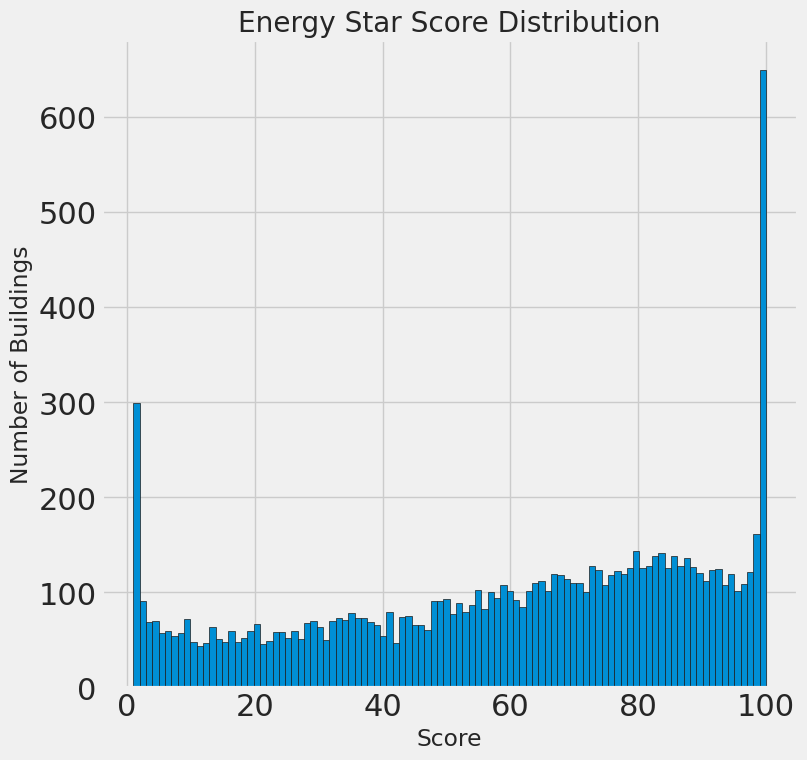

In [103]:
figsize(8, 8)

# Rename the score 
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

Выглядит подозрительно! Балл Energy Star Score является процентилем, значит следует ожидать единообразного распределения, когда каждый балл присваивается одному и тому же количеству зданий. Однако высший и низший результаты получило непропорционально большое количество зданий (для Energy Star Score чем больше, тем лучше).


Определение из вики - Этот термин был впервые использован в 1885 году статистиком Фрэнсисом Гальтоном. Это мера, в которой процентное значение общих значений равно этой мере или меньше таковой. Например, 90 % значений данных находятся ниже 90-го процентиля, а 10 % значений данных находятся ниже 10-го процентиля.[2]

Если мы снова посмотрим на определение этого балла, то увидим, что он рассчитывается на основе «самостоятельно заполняемых владельцами зданий отчётов», что может объяснить избыток очень больших значений. Просить владельцев зданий сообщать о своём энергопотреблении, это как просить студентов сообщать о своих оценках на экзаменах. Так что это, пожалуй, не самый объективный критерий оценки энергоэффективности недвижимости.


Если бы у нас был неограниченный запас времени, то можно было бы выяснить, почему так много зданий получили очень высокие и очень низкие баллы. Для этого нам пришлось бы выбрать соответствующие здания и внимательно их проанализировать. Но нам нужно только научиться прогнозировать баллы, а не разработать более точный метод оценки. Можно пометить себе, что у баллов подозрительное распределение, но мы сосредоточимся на прогнозировании.


Но выбросы все же удалим

In [104]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

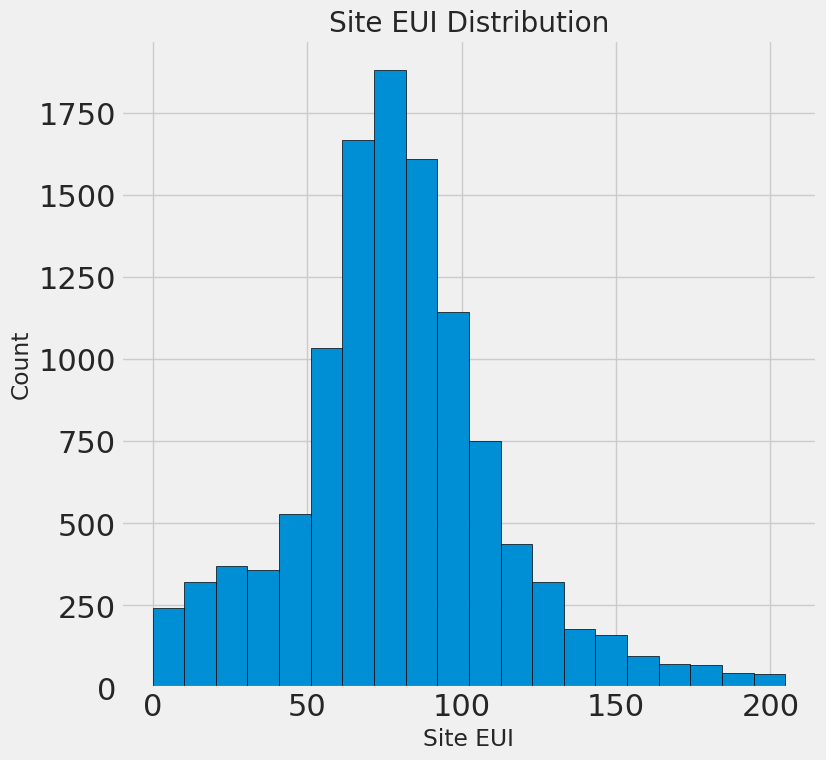

In [105]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

###### Поиск взаимосвязей


Главная часть РАД — поиск взаимосвязей между признаками и нашей целью. Коррелирующие с ней переменные полезны для использования в модели, потому что их можно применять для прогнозирования. Один из способов изучения влияния категориальной переменной (которая принимает только ограниченный набор значений) на цель — это построить график плотности с помощью библиотеки Seaborn.


График плотности можно считать сглаженной гистограммой, потому что он показывает распределение одиночной переменной. Можно раскрасить отдельные классы на графике, чтобы посмотреть, как категориальная переменная меняет распределение. Этот код строит график плотности Energy Star Score, раскрашенный в зависимости от типа здания (для списка зданий с более чем 100 измерениями):

/tmp/ipykernel_86/1539469085.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
/tmp/ipykernel_86/1539469085.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
/tmp/ipykernel_86/1539469085.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
/tmp/ipykernel_86/1539469085.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),


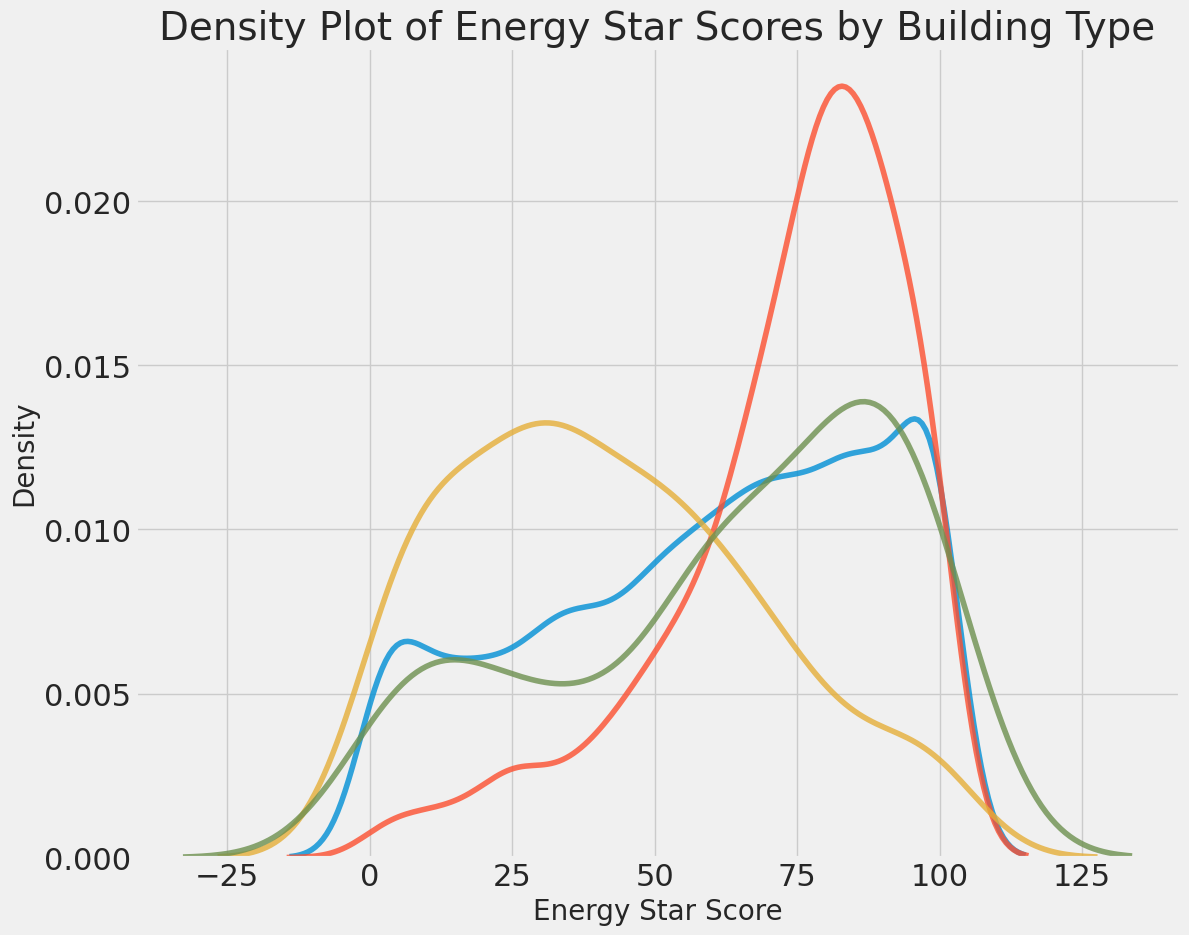

In [106]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star Scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

Как видите, тип здания сильно влияет на количество баллов. Офисные здания обычно имеют более высокий балл, а отели более низкий. Значит нужно включить тип здания в модель, потому что этот признак влияет на нашу цель. В качестве категориальной переменной мы должны выполнить one-hot кодирование типа здания.


Аналогичный график можно использовать для оценки Energy Star Score по районам города:


In [107]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

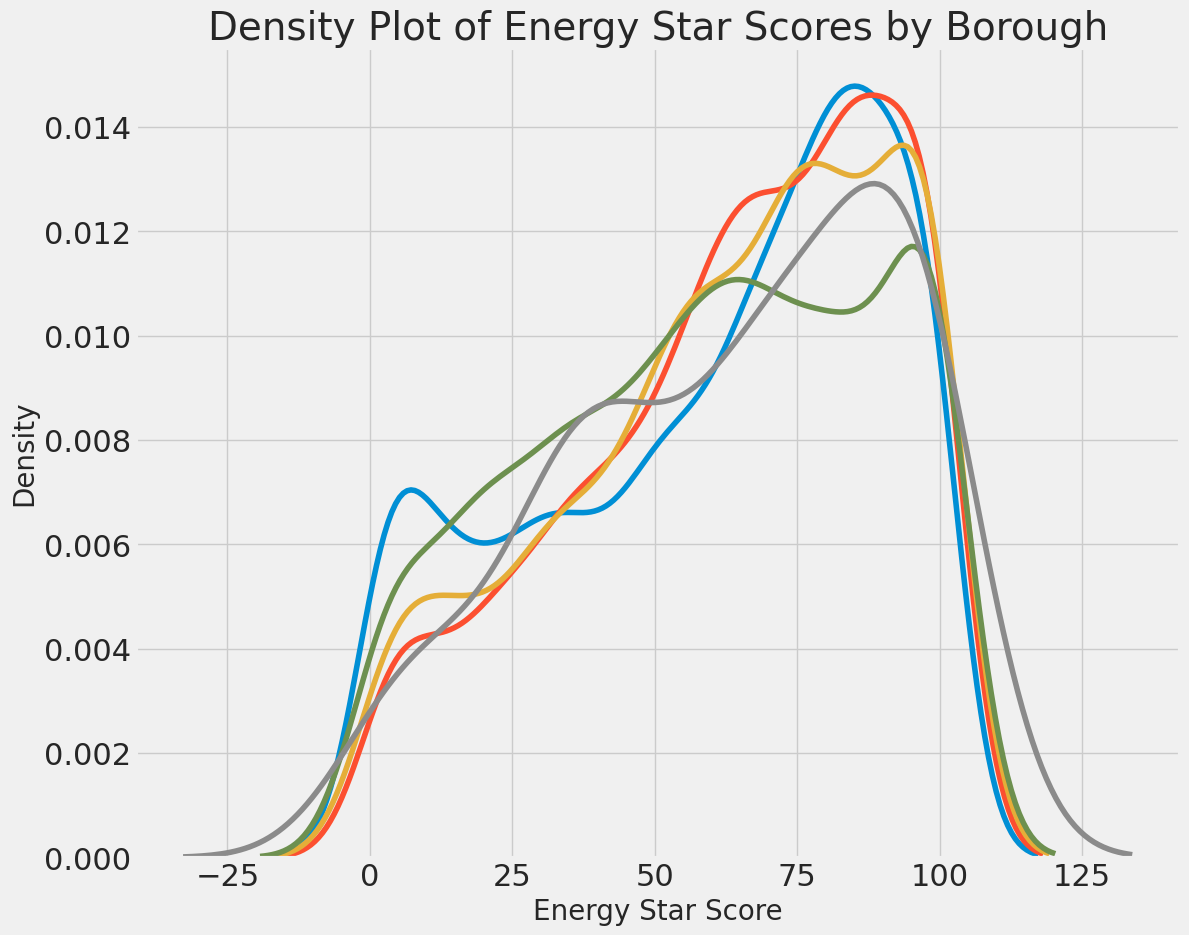

In [108]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

Район не так сильно влияет на балл, как тип здания. Тем не менее мы включим его в модель, потому что между районами существует небольшая разница.


Чтобы посчитать взаимосвязи между переменными, можно использовать коэффициент корреляции Пирсона. Это мера интенсивности и направления линейной зависимости между двумя переменными. Значение +1 означает идеально линейную положительную зависимость, а -1 означает идеально линейную отрицательную зависимость.

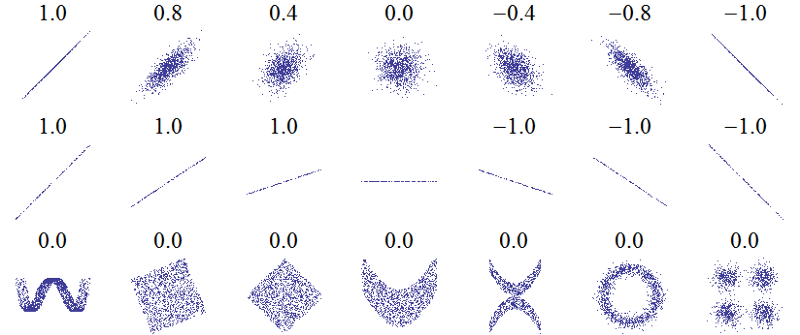

In [109]:
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

/tmp/ipykernel_86/364858316.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_data = data.corr()['score'].sort_values()


Есть несколько сильных отрицательных корреляций между признаками и целью, причём наибольшие из них относятся к разным категориям EUI (способы расчёта этих показателей слегка различаются). EUI  (Energy Use Intensity,  интенсивность использования энергии) —  это количество энергии, потреблённой зданием, делённое на квадратный фут площади. Эта удельная величина используется для оценки энергоэффективности, и чем она меньше, тем лучше. Логика подсказывает, что эти корреляции оправданны: если EUI увеличивается, то Energy Star Score должен снижаться.


Воспользуемся диаграммами рассеивания для визуализации взаимосвязей между двумя непрерывными переменными. К цветам точек можно добавить дополнительную информацию, например, категориальную переменную. Ниже показана взаимосвязь Energy Star Score и EUI, цветом обозначены разные типы зданий:


Далее мы берем логарифмические и квадратно-корневые преобразования числовых переменных, сразу же кодируем две выбранные категориальные переменные (тип здания и район), вычисляем корреляции между всеми функциями и оценкой и отображаем 15 лучших. самые положительные и 15 самых отрицательных корреляций.

In [110]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
# correlations = features.corr()['score'].dropna().sort_values()

/mnt/c/c/ds/env/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/mnt/c/c/ds/env/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/mnt/c/c/ds/env/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/mnt/c/c/ds/env/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/mnt/c/c/ds/env/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/mnt/c/c/ds/env/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero enco

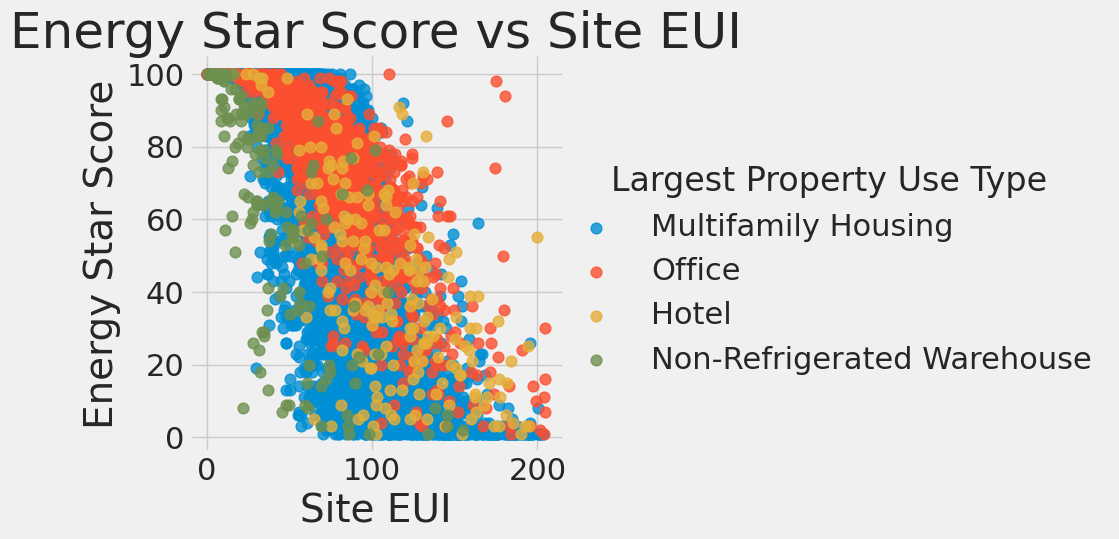

In [111]:
figsize(12, 10)

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot(x='Site EUI (kBtu/ft²)', y='score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

Этот график позволяет визуализировать коэффициент корреляции -0,7. По мере уменьшения EUI увеличивается Energy Star Score, эта взаимосвязь наблюдается у зданий разных типов.

Наш последний исследовательский график называется Pairs Plot (парный график). Это прекрасный инструмент, позволяющий увидеть взаимосвязи между различными парами переменных и распределение одиночных переменных. Мы воспользуемся библиотекой Seaborn и функцией PairGrid для создания парного графика с диаграммой рассеивания в верхнем треугольнике, с гистограммой по диагонали, двухмерной диаграммой плотности ядра и коэффициентов корреляции в нижнем треугольнике.

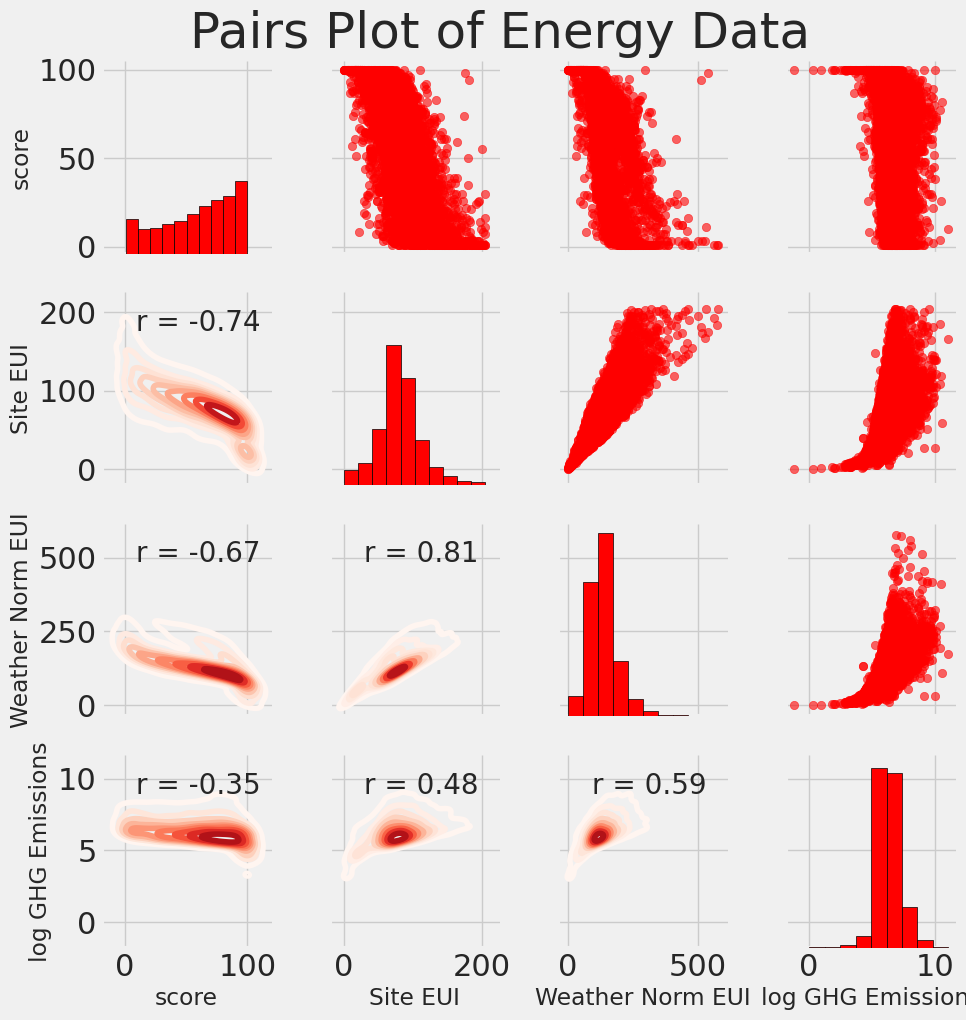

In [112]:
# Extract the columns to plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

Чтобы увидеть взаимосвязи переменных, поищем пересечения рядов и колонок. Допустим, нужно посмотреть корреляцию Weather Norm EUI и score, тогда мы ищем ряд Weather Norm EUI и колонку score, на пересечении которых стоит коэффициент корреляции -0,67. Эти графики не только классно выглядят, но и помогают выбрать переменные для модели.


## Конструирование и выбор признаков


Конструирование и выбор признаков зачастую приносит наибольшую отдачу с точки зрения времени, потраченного на машинное обучение. Сначала дадим определения:

Конструирование признаков: процесс извлечения или создания новых признаков из сырых данных. Чтобы использовать переменные в модели, возможно, их придётся преобразовывать, скажем, брать натуральный логарифм, или извлекать квадратный корень, или применять one-hot кодирование категориальных переменных. Конструирование признаков можно рассматривать как создание дополнительных признаков из сырых данных.


Выбор признаков: процесс выбора из данных самых релевантных признаков, в ходе которого мы удаляем часть признаков, чтобы помочь модели лучше обобщать новые данные ради получения более интерпретируемой модели. Выбор признаков можно рассматривать как удаление «лишнего», чтобы осталось только самое важное.

Модель машинного обучения может учиться только на предоставленных нами данных, поэтому крайне важно удостовериться, что мы включили всю релевантную для нашей задачи информацию. Если не предоставить модели корректные данные, она не сможет научиться и не будет выдавать точные прогнозы!


Мы сделаем следующее:


Применим к категориальным переменным (квартал и тип собственности) one-hot кодирование.


Добавим взятие натурального логарифма от всех числовых переменных.


One-hot кодирование необходимо для того, чтобы включить в модель категориальные переменные. Алгоритм машинного обучения не сможет понять тип «офис», так что если здание офисное, мы присвоим ему признак 1, а если не офисное, то 0.

Добавление преобразованных признаков поможет модели узнать о нелинейных взаимосвязях внутри данных. В анализе данных является нормальной практикой извлекать квадратные корни, брать натуральные логарифмы или ещё как-то преобразовывать признаки, это зависит от конкретной задачи или вашего знания лучших методик. В данном случае мы добавим натуральный логарифм всех числовых признаков.

Этот код выбирает числовые признаки, вычисляет их логарифмы, выбирает два категориальных признака, применяет к ним one-hot кодирование и объединяет оба множества в одно. 

In [113]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

/mnt/c/c/ds/env/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/mnt/c/c/ds/env/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/mnt/c/c/ds/env/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/mnt/c/c/ds/env/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/mnt/c/c/ds/env/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/mnt/c/c/ds/env/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero enco

Теперь у нас есть больше 11 000 наблюдений (зданий) со 110 колонками (признаками). Не все признаки будут полезны для прогнозирования Energy Star Score, поэтому займёмся выбором признаков и удалим часть переменных.

In [114]:
features.shape


(11319, 110)

Многие из имеющихся 110 признаков избыточны, потому что сильно коррелируют друг с другом. К примеру, вот график EUI и Weather Normalized Site EUI, у которых коэффициент корреляции равен 0,997.


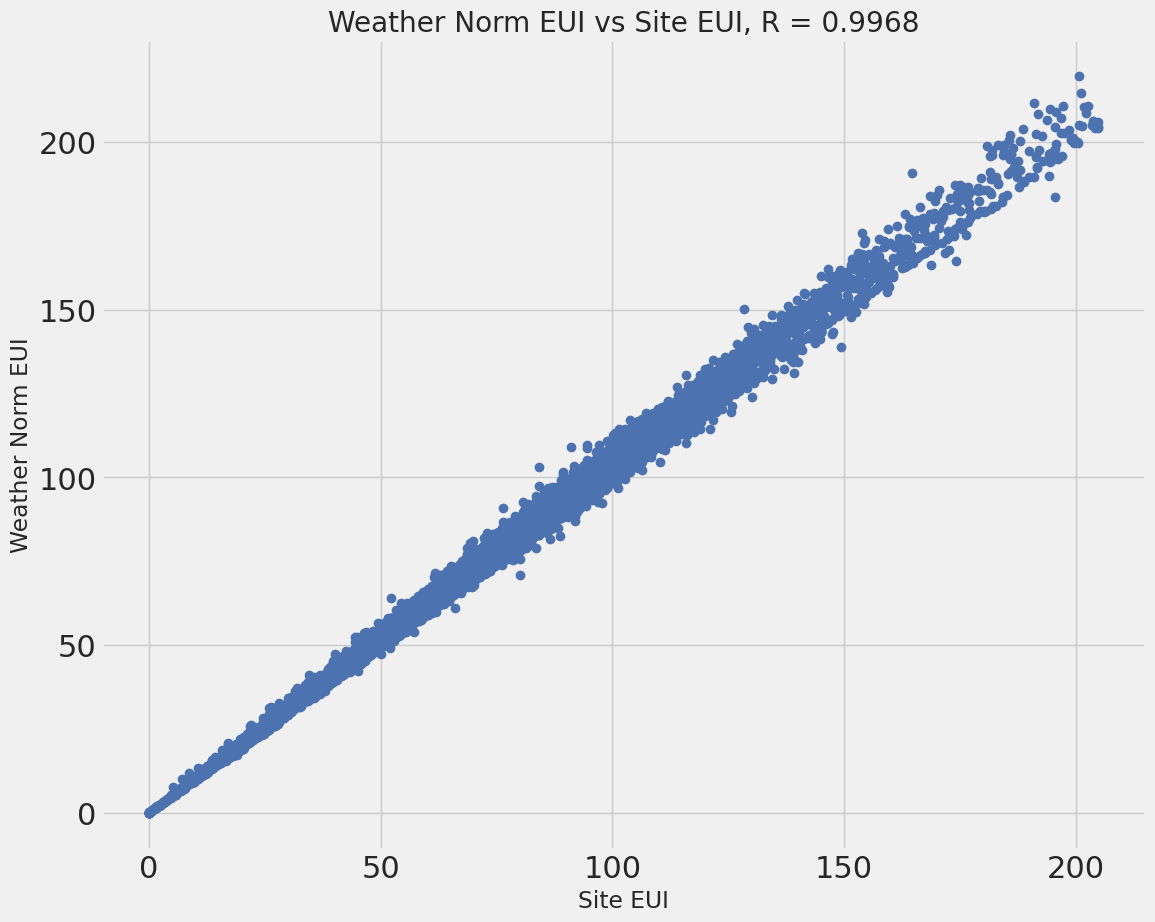

In [115]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);


Признаки, которые сильно коррелируют друг с другом, называются коллинеарными. Удаление одной переменной в таких парах признаков часто помогает модели обобщать и быть более интерпретируемой. Обратите внимание, что речь идёт о корреляции одних признаков с другими, а не о корреляции с целью, что только помогло бы нашей модели!


Существует ряд методов вычисления коллинеарности признаков, и один из самых популярных — фактор увеличения дисперсии (variance inflation factor). Мы для поиска и удаления коллинеарных признаков воспользуемся коэффициентом В-корреляции (thebcorrelation coefficient). Отбросим одну пару признаков, если коэффициент корреляции между ними больше 0,6. Код приведён в блокноте (и в ответе на Stack Overflow).


Это значение выглядит произвольным, но на самом деле автор исследования пробовал разные пороги, и приведённый выше позволил создать наилучшую модель. Машинное обучение эмпирично, и часто приходится экспериментировать, чтобы найти лучшее решение. После выбора у нас осталось 64 признака и одна цель.

In [116]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [117]:
features = remove_collinear_features(features, 0.6);


In [118]:
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

In [119]:
features

Order  Property Id  DOF Gross Floor Area  Year Built  \
12        15      2637863                   NaN        1903   
17        20      2777309                   NaN        1907   
18        21      2780056                   NaN        1939   
19        22      4988574              179130.0        1939   
20        23      4988569              102150.0        1939   
...      ...          ...                   ...         ...   
11741  14988      4940453               70645.0        1928   
11742  14989      4940416               93500.0        1926   
11743  14990      4628296                   NaN        1913   
11744  14991      4940464               57824.0        1928   
11745  14993      4952165               60720.0        1930   

       Number of Buildings - Self-reported  Occupancy  Site EUI (kBtu/ft²)  \
12                                       2        100                 32.0   
17                                       7        100                120.0   
18                                       2        100                 76.2   
19                                       1        100                 75.7   
20                                       1        100                 77.1   
...                                    ...        ...                  ...   
11741                                    1        100                 81.4   
11742                                    1        100                109.3   
11743                                    1         95                 44.3   
11744                                    1        100                 70.0   
11745                                    1        100                130.2   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
12                                                   7.5         
17                                                   8.7         
18                                                   3.5         
19                                                   4.0         
20                                                   2.6         
...                                                  ...         
11741                                                3.3         
11742                                                5.3         
11743                                                7.7         
11744                                                2.6         
11745                                                3.4         

       Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
12                                                   0.0            
17                                                   0.9            
18                                                   0.0            
19                                                   0.0            
20                                                   0.0            
...                                                  ...            
11741                                                0.8            
11742                                                0.9            
11743                                                0.2            
11744                                                0.7            
11745                                                1.3            

       Water Intensity (All Water Sources) (gal/ft²)  ...  \
12                                             51.01  ...   
17                                               NaN  ...   
18                                             18.40  ...   
19                                               NaN  ...   
20                                               NaN  ...   
...                                              ...  ...   
11741                                          31.12  ...   
11742                                          41.63  ...   
11743                                            NaN  ...   
11744                                          27.80  ...   
11745               

###### Выбираем базовый уровень


Мы очистили данные, провели разведочный анализ и сконструировали признаки. И прежде чем перейти к созданию модели, нужно выбрать исходный базовый уровень (naive baseline) — некое предположение, с которым мы будем сравнивать результаты работы моделей. Если они окажутся ниже базового уровня, мы будем считать, что машинное обучение неприменимо для решения этой задачи, или что нужно попробовать иной подход.


Для регрессионных задач в качестве базового уровня разумно угадывать медианное значение цели на обучающем наборе для всех примеров в тестовом наборе. Эти наборы задают барьер, относительно низкий для любой модели.


В качестве метрики возьмём среднюю абсолютную ошибку (mae) в прогнозах. Для регрессий есть много других метрик, но мне нравится совет выбирать какую-то одну метрику и с её помощью оценивать модели. А среднюю абсолютную ошибку легко вычислить и интерпретировать.


Прежде чем вычислять базовый уровень, нужно разбить данные на обучающий и тестовый наборы:


Обучающий набор признаков — то, что мы предоставляем нашей модели вместе с ответами в ходе обучения. Модель должна выучить соответствие признаков цели.


Тестовый набор признаков используется для оценки обученной модели. Когда она обрабатывает тестовый набор, то не видит правильных ответов и должна прогнозировать, опираясь только на доступные признаки. Мы знаем ответы для тестовых данных и можем сравнить с ними результаты прогнозирования.

Для нашей задачи мы сначала извлечем все здания без очков Energy Star Score (мы не знаем истинного ответа для этих зданий, поэтому они не будут полезны для обучения или тестирования). Затем мы разделим здания с рейтингом Energy Star Score на тестовый набор из 30% зданий и обучающий набор из 70% зданий.

In [120]:
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


In [121]:
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


Теперь вычислим показатель для исходного базового уровня:


In [122]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164


/mnt/c/c/ds/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Средняя абсолютная ошибка на тестовом наборе составила около 25 пунктов. Поскольку мы оцениваем в диапазоне от 1 до 100, то ошибка составляет 25 % — довольно низкий барьер для модели!


###### Сохраним промежуточный результат нашей работы

In [123]:
# Save the no scores, training, and testing data
no_score.to_csv('no_score.csv', index = False)
X.to_csv('training_features.csv', index = False)
X_test.to_csv('testing_features.csv', index = False)
y.to_csv('training_labels.csv', index = False)
y_test.to_csv('testing_labels.csv', index = False)

In [124]:
train_features = pd.read_csv('training_features.csv')
test_features = pd.read_csv('testing_features.csv')
train_labels = pd.read_csv('training_labels.csv')
test_labels = pd.read_csv('testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6622, 64)
Testing Feature Size:   (2839, 64)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


## Оценка и выбор модели


Сегодня мы можем выбирать из множества доступных моделей машинного обучения, и это изобилие бывает пугающим. Конечно, в сети есть сравнительные обзоры, которые помогут сориентироваться при выборе алгоритма, но можно попробовать в работе несколько и посмотреть, какой лучше. Машинное обучение по большей части основывается на эмпирических, а не теоретических результатах, и практически невозможно заранее понять, какая модель окажется точнее.

Обычно рекомендуется начинать с простых, интерпретируемых моделей, таких как линейная регрессия, и если результаты будут неудовлетворительными, то переходить к более сложным, но обычно более точным методам. На этом графике (весьма антинаучном) показана взаимосвязь точности и интерпретируемости некоторых алгоритмов:


Мы будем оценивать пять моделей разной степени сложности:

Линейная регрессия.
Метод k-ближайших соседей.
«Случайный лес».
Градиентный бустинг.
Метод опорных векторов.

###### Заполняем отсутствующие значения


Хотя при очистке данных мы отбросили колонки, в которых не хватает больше половины значений, у нас ещё отсутствует немало значений. Модели машинного обучения не могут работать с отсутствующими данными, поэтому нам нужно их заполнить.

Каждое NaN-значение — это отсутствующая запись в данных. Заполнять их можно по-разному, а мы воспользуемся достаточно простым методом медианного заполнения (median imputation), который заменяет отсутствующие данные средним значениями по соответствующим колонкам.


В нижеприведённом коде мы создадим Scikit-Learn-объект Imputer с медианной стратегией. Затем обучим его на обучающих данных (с помощью imputer.fit), и применим для заполнения отсутствующих значений в обучающем и тестовом наборах (с помощью imputer.transform). То есть записи, которых не хватает в тестовых данных, будут заполняться соответствующим медианным значением из обучающих данных.


In [89]:
from sklearn.preprocessing import Imputer, MinMaxScaler

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/preprocessing/__init__.py)

In [4]:
from sklearn.impute import SimpleImputer


ModuleNotFoundError: No module named 'sklearn'

In [126]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  Order                                                             0
Property Id                                                       0
DOF Gross Floor Area                                             32
Year Built                                                        0
Number of Buildings - Self-reported                               0
                                                                 ..
Largest Property Use Type_Strip Mall                              0
Largest Property Use Type_Supermarket/Grocery Store               0
Largest Property Use Type_Urgent Care/Clinic/Other Outpatient     0
Largest Property Use Type_Wholesale Club/Supercenter              0
Largest Property Use Type_Worship Facility                        0
Length: 64, dtype: int64
Missing values in testing features:   Order                                                             0
Property Id                                                       0
DOF Gross Floor

In [127]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [128]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [129]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


Теперь все значения заполнены, пропусков нет.


###### Масштабирование признаков


Масштабированием называется общий процесс изменения диапазона признака. Это необходимый шаг, потому что признаки измеряются в разных единицах, а значит покрывают разные диапазоны. Это сильно искажает результаты таких алгоритмов, как метод опорных векторов и метод k-ближайших соседей, которые учитывают расстояния между измерениями. А масштабирование позволяет этого избежать. И хотя методы вроде линейной регрессии и «случайного леса» не требует масштабирования признаков, лучше не пренебрегать этим этапом при сравнении нескольких алгоритмов.

Масштабировать будем с помощью приведения каждого признака к диапазону от 0 до 1. Берём все значения признака, выбираем минимальное и делим его на разницу между максимальным и минимальным (диапазон). Такой способ масштабирования часто называют нормализацией, а другой основной способ — стандартизацией.


Этот процесс легко реализовать вручную, поэтому воспользуемся объектом MinMaxScaler из Scikit-Learn. Код для этого метода идентичен коду для заполнения отсутствующих значений, только вместо вставки применяется масштабирование. Напомним, что учим модель только на обучающем наборе, а затем преобразуем все данные.


In [130]:
from sklearn.preprocessing import MinMaxScaler


In [131]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [132]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

Теперь у каждого признака минимальное значение равно 0, а максимальное 1. Заполнение отсутствующих значений и масштабирование признаков — эти два этапа нужны почти в любом процессе машинного обучения.


## Реализуем в Scikit-Learn модели машинного обучения


После всех подготовительных работ процесс создания, обучения и прогона моделей относительно прост. Мы будем использовать в Python библиотеку Scikit-Learn, прекрасно документированную и с продуманным синтаксисом построения моделей. Научившись создавать модель в Scikit-Learn, вы сможете быстро реализовывать всевозможные алгоритмы.


In [133]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [135]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 13.4651


In [136]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 10.9337


In [137]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 9.5231


In [138]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 10.0116


In [139]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 13.0131


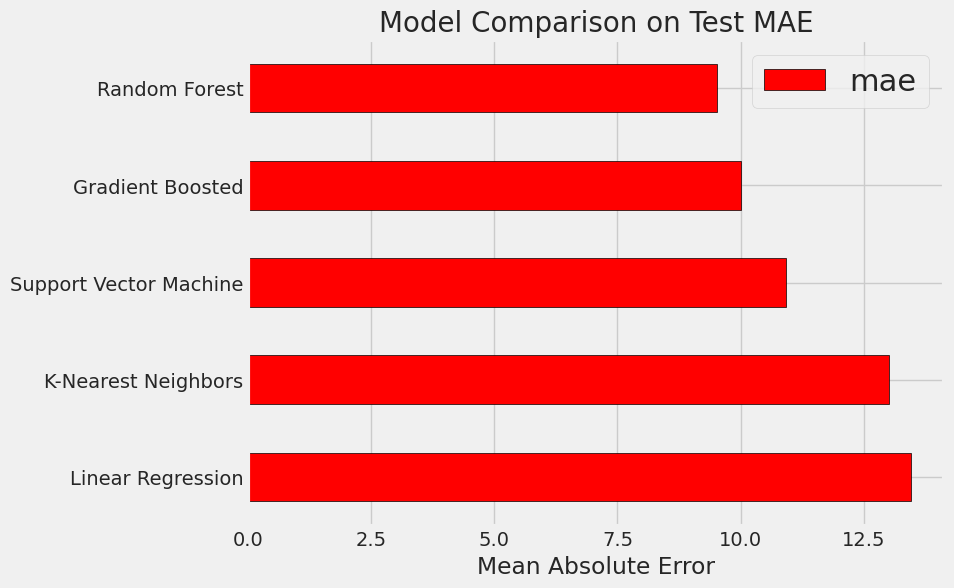

In [140]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

В зависимости от запуска (точные результаты каждый раз немного меняются), Случайный лес работает лучше всего, за ним следует бустинг. Я должен признать, что это не самое честное сравнение, потому что мы используем в основном гиперпараметры по умолчанию. Особенно с регрессором опорных векторов гиперпараметры оказывают значительное влияние на производительность. (методы случайного леса и повышения градиента отлично подходят для начала, потому что производительность меньше зависит от настроек модели). Тем не менее, из этих результатов мы можем сделать вывод, что машинное обучение применимо, поскольку все модели значительно превосходят базовые!

Отсюда я собираюсь сосредоточиться на оптимизации лучшей модели с помощью настройки гиперпараметров. Учитывая полученные здесь результаты, я сосредоточусь на использовании GradientBoostingRegressor. Это реализация Scikit-Learn Gradient Boosted Trees, которая выиграла множество соревнований Kaggle за последние несколько лет. Версия Scikit-Learn, как правило, медленнее, чем версия XGBoost, но здесь мы будем придерживаться Scikit-Learn, потому что синтаксис  схож и не потребует от нас изменения кода.

В оригинальной статье, алгоритмы ведут себя немного хуже

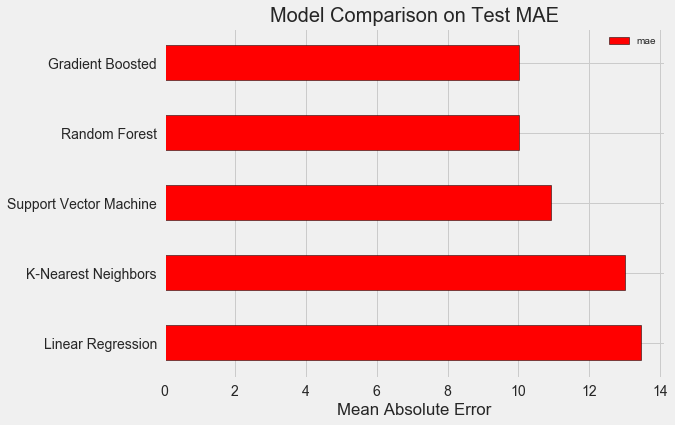

## Гиперпараметрическая оптимизация модели


Гиперпараметры модели можно считать настройками алгоритма, которые мы задаём до начала его обучения. Например, гиперпараметром является количество деревьев в «случайном лесе», или количество соседей в методе k-ближайших соседей.
Параметры модели — то, что она узнаёт в ходе обучения, например, веса в линейной регрессии.

Управляя гиперпараметром, мы влияем на результаты работы модели, меняя баланс между её недообучением и переобучением. 

Трудность выбора правильных гиперпараметров заключается в том, что для каждой задачи будет уникальный оптимальный набор. Поэтому единственный способ выбрать наилучшие настройки — попробовать разные комбинации на новом датасете. К счастью, в Scikit-Learn есть ряд методов, позволяющих эффективно оценивать гиперпараметры. Более того, в проектах вроде TPOT делаются попытки оптимизировать поиск гиперпараметров с помощью таких подходов, как генетическое программирование. 

    loss: минимизация функции потерь;
    n_estimators: количество используемых слабых деревьев решений (decision trees);
    max_depth: максимальная глубина каждого дерева решений;
    min_samples_leaf: минимальное количество примеров, которые должны быть в «листовом» (leaf) узле дерева решений;
    min_samples_split: минимальное количество примеров, которые нужны для разделения узла дерева решений;
    max_features: максимальное количество признаков, которые используются для разделения узлов.

In [141]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

Не уверен, что хоть кто-нибудь действительно понимает, как всё это работает, и единственный способ найти лучшую комбинацию — перепробовать разные варианты.


Далее мы создаём сетку из гиперпараметров, затем создаём объект RandomizedSearchCV и ищем с помощью 4-блочной перекрёстной проверки по 25 разным комбинациям гиперпараметров:


In [142]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [143]:
random_cv.fit(X, y)


Fitting 4 folds for each of 25 candidates, totalling 100 fits


/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/mnt/c/c/ds/env/lib/python3.10/site-

RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

Это заняло у меня 14 минут....

После обновления железа заняло 9 минут //26.02.23 DA//

In [144]:
random_cv.best_estimator_


GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                          min_samples_split=6, n_estimators=500,
                          random_state=42)

In [145]:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

TypeError: GradientBoostingRegressor.__init__() got an unexpected keyword argument 'min_impurity_split'

In [147]:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=500, random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                          min_samples_split=6, n_estimators=500,
                          random_state=42)

Эти результаты можно использовать для сеточного поиска, выбирая для сетки параметры, которые близки к этим оптимальным значениям. Но дальнейшая настройка вряд ли существенно улучшит модель. Есть общее правило: грамотное конструирование признаков окажет на точность модели куда большее влияние, чем самая дорогая гиперпараметрическая настройка. Это закон убывания доходности применительно к машинному обучению: конструирование признаков даёт наивысшую отдачу, а гиперпараметрическая настройка приносит лишь скромную выгоду.

Для изменения количества оценщиков (estimator) (деревьев решений) с сохранением значений других гиперпараметров можно поставить один эксперимент, который продемонстрирует роль этой настройки. Реализация приведена здесь, а вот что получилось в результате:


In [148]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [149]:
grid_search.fit(X, y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was depr

GridSearchCV(cv=4,
             estimator=GradientBoostingRegressor(loss='lad', max_depth=5,
                                                 min_samples_leaf=6,
                                                 min_samples_split=6,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
2.59 start/ final in 3.03

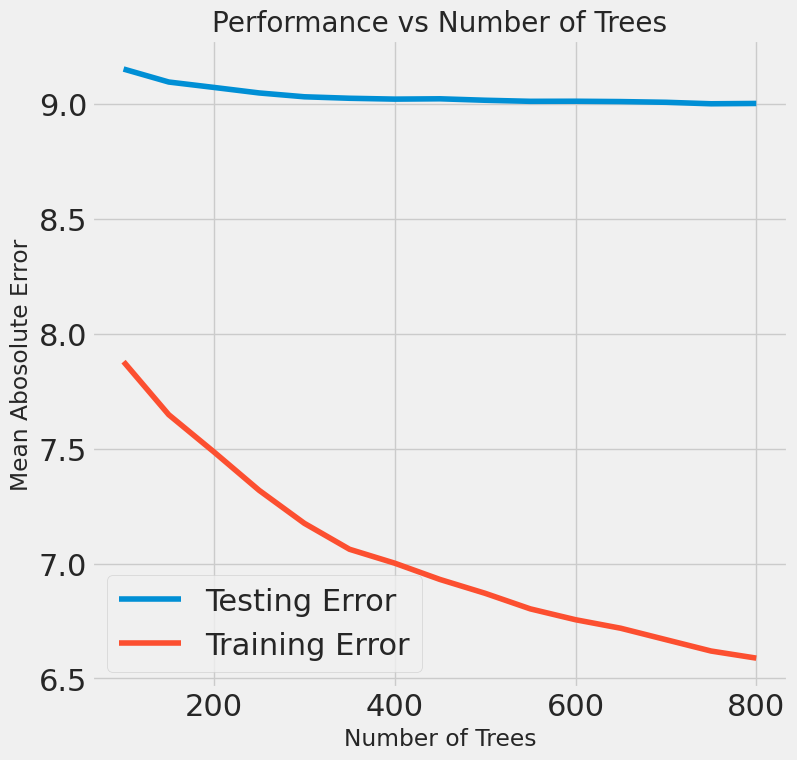

In [150]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [151]:
results.sort_values('mean_test_score', ascending = False).head(5)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13      24.564101      0.975332         0.015317        0.001901   
14      22.671391      1.194804         0.012886        0.000660   
12      23.739552      0.257606         0.017636        0.001734   
11      24.830456      2.475640         0.019885        0.003215   
9       17.924572      1.510861         0.018406        0.007080   

   param_n_estimators                 params  split0_test_score  \
13                750  {'n_estimators': 750}          -8.901092   
14                800  {'n_estimators': 800}          -8.903857   
12                700  {'n_estimators': 700}          -8.904269   
11                650  {'n_estimators': 650}          -8.906208   
9                 550  {'n_estimators': 550}          -8.918502   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
13          -8.751699          -9.298411          -9.049730        -9.000233   
14          -8.758299          -9.296941          -9.047485        -9.001645   
12          -8.755862          -9.312990          -9.053755        -9.006719   
11          -8.755401          -9.325190          -9.052215        -9.009754   
9           -8.756938          -9.325492          -9.042721        -9.010913   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
13        0.201840                1           -6.716494           -6.660453   
14        0.198797                2           -6.689643           -6.648109   
12        0.205815                3           -6.743886           -6.695770   
11        0.210191                4           -6.778068           -6.721452   
9         0.207975                5           -6.874737           -6.781878   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
13           -6.520818           -6.579989         -6.619438         0.074807  
14           -6.486269           -6.530287         -6.588577         0.083101  
12           -6.611240           -6.624919         -6.668953         0.053861  
11           -6.708191           -6.666758         -6.718617         0.039814  
9            -6.809121           -6.745712         -6.802862         0.047201

С ростом количества используемых моделью деревьев снижается уровень ошибок в ходе обучения и тестирования. Но ошибки при обучении снижаются куда быстрее, и в результате модель переобучается: показывает отличные результаты на обучающих данных, но на тестовых работает хуже.


На тестовых данных точность всегда снижается (ведь модель видит правильные ответы для учебного датасета), но существенное падение говорит о переобучении. Решить эту проблему можно с помощью увеличения объёма обучающих данных или уменьшения сложности модели с помощью гиперпараметров. Здесь мы не будем касаться гиперпараметров, но я рекомендую всегда уделять внимание проблеме переобучения.


## Оценка с помощью тестовых данных


Будучи ответственными людьми мы удостоверились, что наша модель никоим образом не получала доступ к тестовым данным в ходе обучения. Поэтому точность при работе с тестовыми данными мы можем использовать в роли индикатора качества модели, когда её допустят к реальным задачам.


In [152]:
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                          min_samples_split=6, n_estimators=750,
                          random_state=42)

In [153]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

1.47 s ± 9.93 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [ ]:
28 секунд
1.47 секунды

In [154]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was depr

19.9 s ± 189 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [ ]:
48с
19с

Скормим модели тестовые данные и вычислим ошибку. Вот сравнение результатов алгоритма градиентного бустинга по умолчанию и нашей настроенной модели:


In [156]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 10.0119.
Final model performance on the test set:   MAE = 9.0474.


Гиперпараметрическая настройка помогла улучшить точность модели  у автора статьи примерно на 10 %. В зависимости от ситуации это может быть очень значительное улучшение, но требующее немало времени.


Эта ситуация иллюстрирует фундаментальный аспект машинного обучения: всё дело в компромиссах. Постоянно приходится выбирать баланс между точностью и интерпретируемостью, между смещением и дисперсией, между точностью и временем работы, и так далее. Правильное сочетание полностью определяется конкретной задачей. В нашем случае 15-кратное увеличение длительности работы в относительном выражении велико, но в абсолютном — незначительно.

Мы получили финальные результаты прогнозирования, давайте теперь их проанализируем и выясним, есть ли какие-то заметные отклонения. сначала посмотрим на график плотности прогнозных и реальных значений, потом на — гистограмма погрешности:


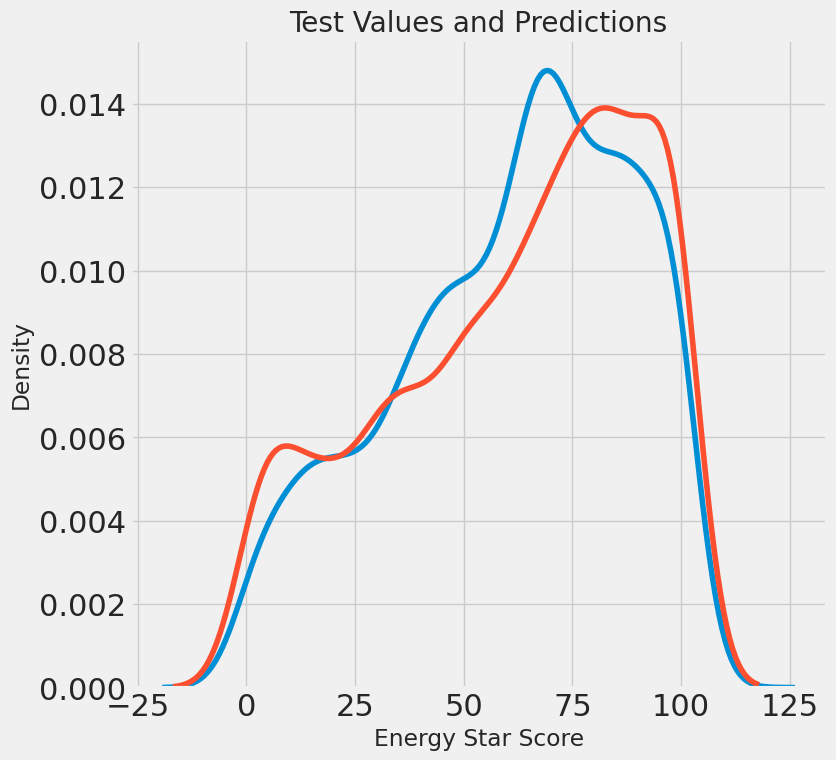

In [157]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

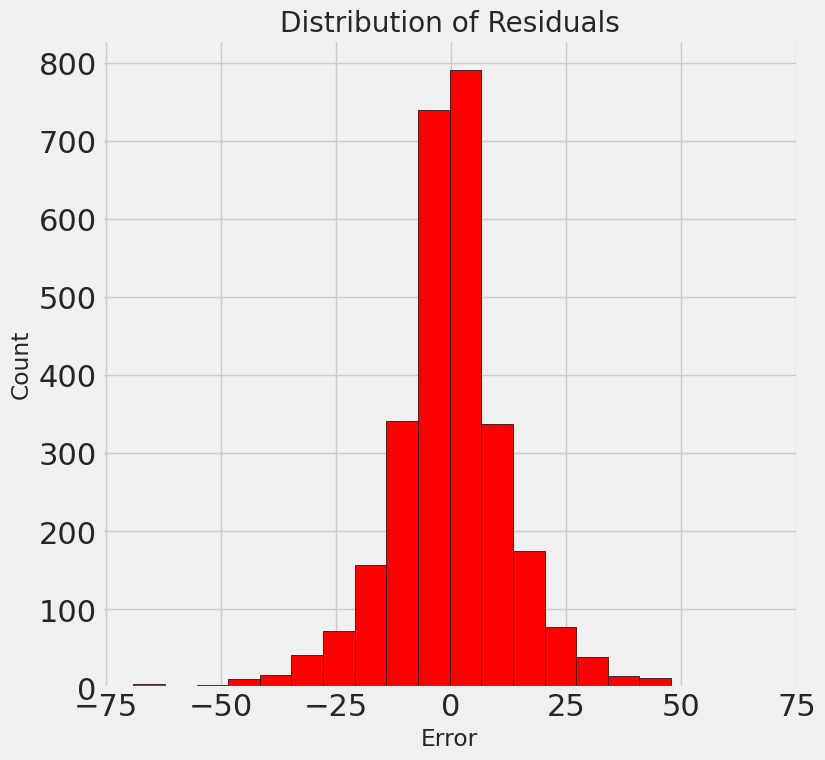

In [158]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

Прогноз модели неплохо повторяет распределение реальных значений, при этом на обучающих данных пик плотности расположен ближе к медианному значению (66), чем к реальному пику плотности (около 100). Погрешности имеют почти нормальное распределение, хотя есть несколько больших отрицательных значений, когда прогноз модели сильно отличается от реальных данных.


Результаты свидетельствуют, что мы можем применять машинное обучение для прогнозирования баллов Energy Star Score на основе доступной статистики. С помощью градиентного бустинга удалось на тестовых данных добиться погрешности в пределах 9,1. Гиперпараметрическая настройка может сильно улучшить результаты, но ценой значительного замедления работы. Это один из многих компромиссов, которые нужно учитывать в машинном обучении.


## Интерпретация модели


Если мы знаем, что модель точна, и то попробуем понять, почему она прогнозирует именно так и что это говорит нам о самой задаче.

Регрессия на основе градиентного бустинга располагается примерно посередине шкалы интерпретируемости моделей: сама модель сложная, но состоит из сотен довольно простых деревьев решений. Есть три способа разобраться в работе нашей модели:

Оценить важности признаков.
Визуализировать одно из деревьев решений.
Применить метод LIME — Local Interpretable Model-Agnostic Explainations, локальные интерпретируемые моделезависимые объяснения.

###### Важности признаков


Важности признаков позволяют увидеть связь каждого признака с целью прогнозирования. Технические подробности этого метода сложны (измеряется среднее уменьшение инородности (the mean decrease impurity) или уменьшение ошибки из-за включения признака), но мы можем использовать относительные значения, чтобы понять, какие признаки более релевантны. В Scikit-Learn можно извлечь важности признаков из любого ансамбля «учеников» на основе деревьев.

В приведённом ниже коде final_model — наша обученная модель, и с помощью model.feature_importances_ можно определить важности признаков.

In [159]:
import pandas as pd

# model is the trained model
importances = final_model.feature_importances_

# train_features is the dataframe of training features
feature_list = list(train_features.columns)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)

feature_results.head(10)

feature  importance
0                                Site EUI (kBtu/ft²)    0.441652
1  Weather Normalized Site Electricity Intensity ...    0.252588
2      Water Intensity (All Water Sources) (gal/ft²)    0.052963
3  log_Water Intensity (All Water Sources) (gal/ft²)    0.033382
4                                        Property Id    0.027111
5                               DOF Gross Floor Area    0.024714
6      Largest Property Use Type_Multifamily Housing    0.022205
7                                         Year Built    0.021092
8  Largest Property Use Type_Non-Refrigerated War...    0.019652
9        log_Direct GHG Emissions (Metric Tons CO2e)    0.019160

Самые важные признаки — Site EUI (интенсивность потребления энергии) и Weather Normalized Site Electricity Intensity, на них приходится больше 66 % суммарной важности. Уже у третьего признака важность сильно падает, это может говорить о том, что нам не нужно использовать все 64 признака для достижения высокой точности прогнозирования

###### Выводы по проекту

С помощью данных об энергопотреблении зданий в Нью-Йорке можно построить модель, прогнозирующую количество баллов Energy Star Score с погрешностью в пределах 9,1 пункта.
Site EUI и Weather Normalized Electricity Intensity — главные факторы, влияющие на прогноз.

https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/Building%20Data%20Report.pdf

https://github.com/WillKoehrsen/machine-learning-project-walkthrough

https://medium.com/@Radiologist/l1-%D0%B8-l2-%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F-f6891b354507

## А  что если проблема с переобучением осталась? L1 и L2 регуляризация для линейной регрессии


Регуляризация в машинном обучении вносит в обучающую функцию систему «штрафов» за слишком большие коэффициенты и помогает избавляться от ненужных свойств (шумов).

###### L1 и L2 регуляризация


Регуляризация может быть двух основных видов:



L1-регуляризация — она же «манхэттенское расстояние» или «регрессия лассо». Ее идея заключается в том, чтобы сводить набор правил на наиболее важных функциях, которые влияют на конечный результат. Этот способ выглядит как способ выбора признаков. Выражается формулой: $$L1 = Σ(yi — y(ti))2 + λΣ|ai|$$



L2-регуляризация — она же регуляризация Тихонова или «регрессия хребта». Этот вид регуляризации несколько похож на первый вид. По крайней мере, они выполняют одни и те же функции. Однако основная направленность деятельности этого метода — агрессивное применение штрафов. Практически получается, что этот метод не подходит для выбора признаков функции. В этом его основное отличие от L1. Выражается формулой: $$L2 = Σ(yi — y(ti))2 + λΣai2$$

Регуляризация — это способ добавить дополнительную информацию к условию некорректно поставленной задачи, а также предотвратить влияние шумов и переобучение. Регуляризация — это «штраф» за сложность модели, поэтому она делает обучение проще и эффективнее. Регуляризация довольно часто применяется в машинном обучении, когда нужно обучить модель на большом количестве данных и сохранить возможность ее адаптации к другим видам данных.

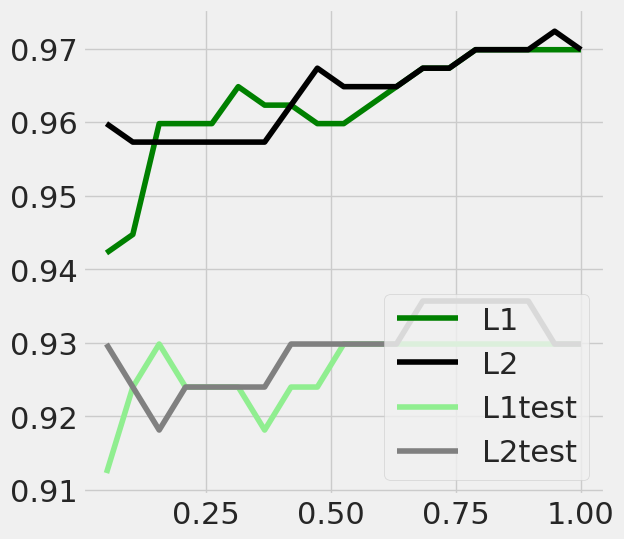

In [160]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

l1 = []
l2 = []
l1test = []
l2test = []

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)

for i in np.linspace(0.05, 1, 19):
    lrl1 = LR(penalty="l1", solver="liblinear", C=i, max_iter=1000)
    lrl2 = LR(penalty="l2", solver="liblinear", C=i, max_iter=1000)
    lrl1 = lrl1.fit(Xtrain, Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain), Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest), Ytest))
    lrl2 = lrl2.fit(Xtrain, Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain), Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest), Ytest))

graph = [l1, l2, l1test, l2test]
color = ["green", "black", "lightgreen", "gray"]
label = ["L1", "L2", "L1test", "L2test"]

plt.figure(figsize=(6, 6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05, 1, 19), graph[i], color[i], label=label[i])
plt.legend(loc=4) 
plt.show()

По мере увеличения C интенсивность регуляризации становится все меньше и меньше., Производительность модели на обучающем наборе и на тестовом наборе растет. До C = 0,8 производительность на обучающем наборе все еще растет, но производительность модели на неизвестном наборе данных начинает снижаться